## Table of Contents

- [1. Introduction and Data Preprocessing](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 Packages](#1.2)
    - [1.3 Read or Import](#1.3)
    - [1.4 Data Summary](#1.4)
    - [1.5 Data Preparation](#1.5)
- [2. Exploratory Data Analysis](#2)
    - [2.1 Target Variable](#2.1)
    - [2.2 Features Correlation with Target](#2.2)
    - [2.3 Feature Variable](#2.3)
        - [2.3.1 Overall Qual](#2.3.1)
        - [2.3.2 Garage Cars](#2.3.2)
        - [2.3.3 Gr Liv Area](#2.3.3)
        - [2.3.4 Garage Area](#2.3.4)
        - [2.3.5 Total Bsmt SF](#2.3.5)
    - [2.4 Multicollinearity](#2.4)
- [3. Feature Engineering](#3)
    - [3.1 Missing Values](#3.1)
- [4. Model](#4)
    - [4.1 Logistic Regression](#4.1)
    - [4.2 Random Forest](#4.2)
- [5. Conclusion](#5)

# UNDER REVIEW...

<a name='1'></a>
# 1. Introduction and Data Preprocessing

<a name='1.1'></a>
## 1.1 Problem Statement

sss

<a name='1.2'></a>
## 1.2 Packages

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

<a name='1.3'></a>
## 1.3 Read or Import

In [4]:
df = pd.read_csv("AmesHousing.csv")

<a name='1.4'></a>
## 1.4 Data Summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
numCols = list(df.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

#There are 39 numerical features

There are 39 numerical features:
 ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


In [7]:
catCols = list(df.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} categorical features:\n", catCols)

#There are 43 categorical features

There are 43 categorical features:
 ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']


In [8]:
#We want to only use numerical data for analysis
dfnum = df.select_dtypes(exclude='object')

In [9]:
# (38) Now, we want to know what kind of numerical variable in these features

# (1) 'Order' is just the number of rows
# (2) 'PID', 'MS SubClass' is categorical (ordinal) data in numerical form

# (2) 'Overall Qual', 'Overall Cond', is categorical (ordinal) data in numerical form, useful for analysis
# (3) 'Year Built', 'Year Remod/Add', 'Garage Yr Blt' are time datas but we could interprete this as age continuous data
# (18) Continuous: 'Lot Frontage', 'Lot Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val'
# (11) Discrete: 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Mo Sold', 'Yr Sold'

# From this we know that we don't need variables like 'Order', 'PID', and 'MS SubClass'
dfnum = dfnum.drop(['Order','PID', 'MS SubClass'], axis=1)

In [10]:
dfnum.shape

(2930, 36)

<a name='1.5'></a>
## 1.5 Data Preparation

In [11]:
# Seperate first then split (A)
# Seperate features and target variable
X = dfnum.drop(['SalePrice'], axis=1)
y = dfnum.SalePrice

#Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=None,  
                                   test_size=0.20,  
                                   shuffle=True)

In [12]:
# Split first then separate (B)
# Split the train and test data
dftrain, dftest = train_test_split(dfnum, 
                                   random_state=None,  
                                   test_size=0.20,  
                                   shuffle=True)

# Seperate features and target variable
X_train = dftrain.drop(['SalePrice'], axis=1)
y_train = dftrain.SalePrice
X_test = dftest.drop(['SalePrice'], axis=1)
y_test = dftest.SalePrice

In [13]:
#80/20 split
print(f'X_train: {X_train.shape} ({round(len(X_train)/len(df), 1) * 100}%)')
print(f'y_train: {y_train.shape} ({round(len(y_train)/len(df), 1) * 100}%)')
print(f'X_test: {X_test.shape} ({round(len(X_test)/len(df), 1) * 100}%)')
print(f'y_test: {y_test.shape} ({round(len(y_test)/len(df), 1) * 100}%)')

#Data preview
print('')
print('')
print('X_train: ')
print(X_train.head(3))
print('')
print('y_train: ')
print(y_train.head(3))

X_train: (2344, 35) (80.0%)
y_train: (2344,) (80.0%)
X_test: (586, 35) (20.0%)
y_test: (586,) (20.0%)


X_train: 
      Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
93            25.0      4835             7             5        2004   
2206          40.0      4280             5             6        1913   
1799         112.0     12217             8             5        2007   

      Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
93              2005           0.0        1298.0           0.0        190.0   
2206            2002           0.0         365.0           0.0         75.0   
1799            2007           NaN         745.0           0.0        210.0   

      ...  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
93    ...        506.0           168             50               0   
2206  ...        352.0             0              0              34   
1799  ...        880.0           168            127               0

In [14]:
df.shape

(2930, 82)

<a name='2'></a>
# 2. Exploratory Data Analysis

<a name='2.1'></a>
## 2.1 Target Variable

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


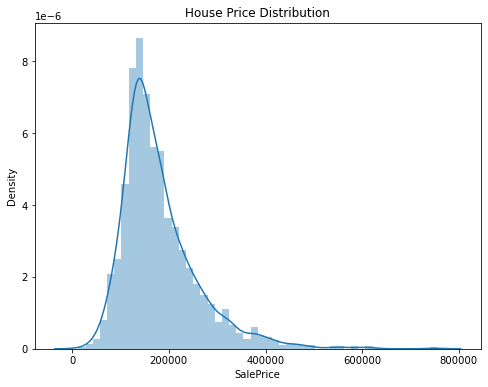

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title("House Price Distribution")

#As we can see, the distribution is right-skewed

In [16]:
print(f"""Skewness: {y.skew()}
Kurtosis: {y.kurt()}""")

Skewness: 1.7435000757376466
Kurtosis: 5.118899951130896


## 2.2 Features Correlation with Target

In [17]:
# Top 10 highest pearson correlation
corr_mat = dftrain.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(11)

SalePrice         1.000000
Overall Qual      0.798685
Gr Liv Area       0.696211
Garage Cars       0.648738
Garage Area       0.631741
Total Bsmt SF     0.627932
1st Flr SF        0.616998
Year Built        0.553713
Full Bath         0.544538
Year Remod/Add    0.535440
Garage Yr Blt     0.526000
Name: SalePrice, dtype: float64

In [18]:
# Seems like the continuous variables like livingrom area, garage area, total bsmt sf, 1st floor sf have high correlation with the sale price
# The number of garage also become one of the most important variable
# Now lets take a deeper analysist into those variables

<a name='2.3'></a>
## 2.3 Feature Variables

<a name='2.3.1'></a>
### 2.3.1 Overall Qual

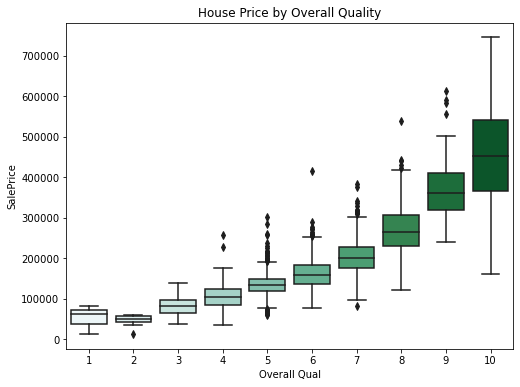

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=dftrain, palette='BuGn')
title = plt.title('House Price by Overall Quality')
# As we can see the distribution support the pearson correlation, the higher the quality the higher the price

<a name='2.3.2'></a>
### 2.3.2 Garage Cars

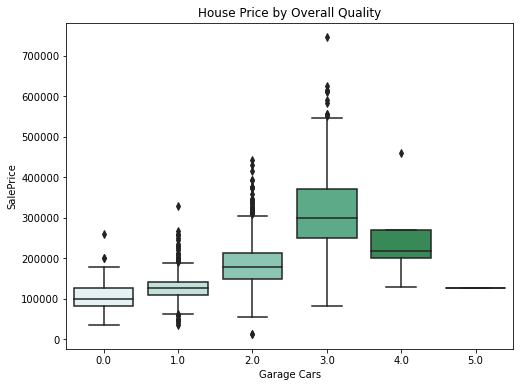

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Garage Cars', y='SalePrice', data=dftrain, palette='BuGn')
title = plt.title('House Price by Overall Quality')

# Its a little bit strange that the highest sale price occured in the house with 3 garage
# It could be the house with 4 or 5 garage consume the total area of the house, or it is so rare that people have 4 or 5 cars

<a name='2.3.3'></a>
### 2.3.3 Gr Liv Area

Correlation:  0.6962114661000518


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x432 with 0 Axes>

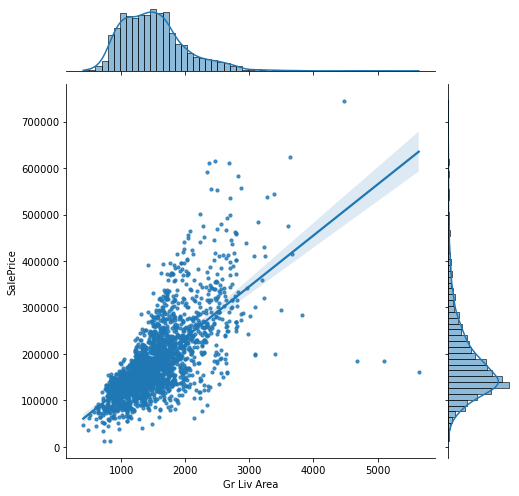

In [21]:
def plotCorrelation(variables):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    # Print correlation
    print("Correlation: ", dftrain[[variables[0],
                                       variables[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(dftrain[(variables[0])],
                  dftrain[(variables[1])],
                  kind='reg',
                  height=7,
                  scatter_kws={'s': 10},
                  marginal_kws={'kde': True})


plotCorrelation(['Gr Liv Area', 'SalePrice'])

<a name='2.3.4'></a>
### 2.3.4 Garage Area

Correlation:  0.6317407231216315


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x432 with 0 Axes>

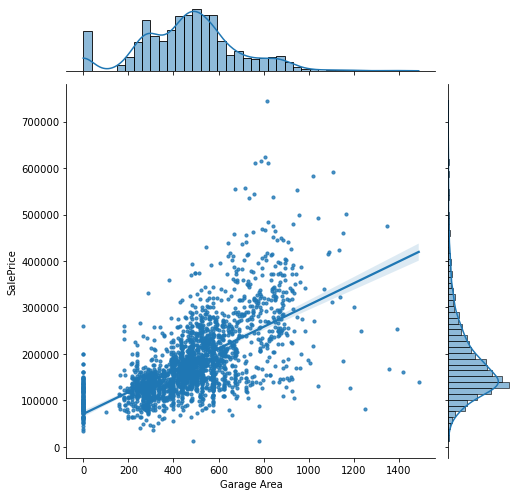

In [22]:
plotCorrelation(['Garage Area', 'SalePrice'])

<a name='2.3.5'></a>
### 2.3.5 Total Bsmt SF

Correlation:  0.6279315801415681


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x432 with 0 Axes>

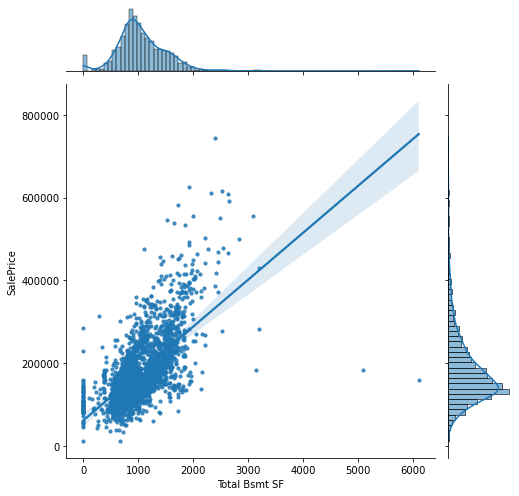

In [23]:
plotCorrelation(['Total Bsmt SF', 'SalePrice'])

<a name='2.4'></a>
## 2.4 Multicollinearity

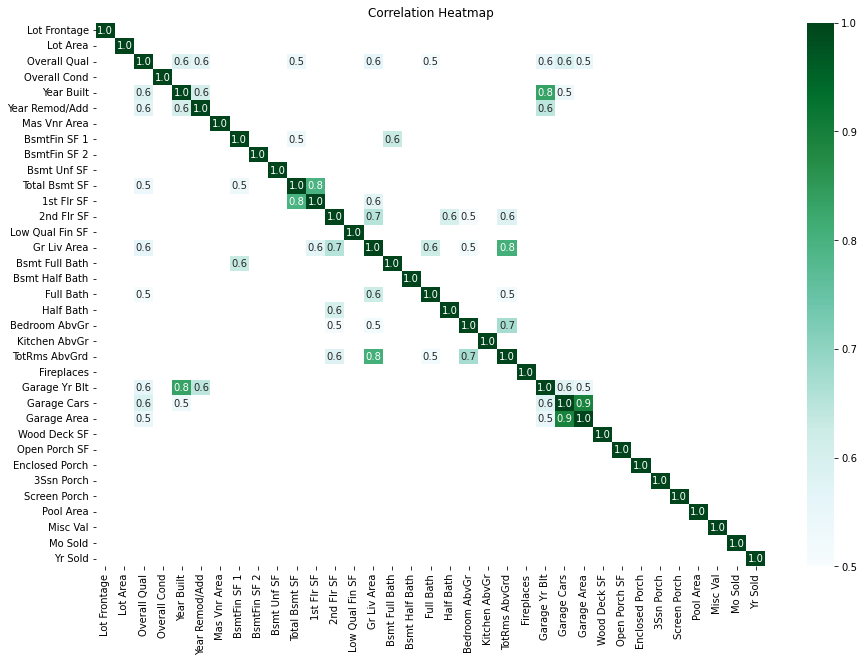

In [24]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = dftrain.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='BuGn',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

<a name='3'></a>
# 3. Feature Engineering

<a name='3.1'></a>
## 3.1 Missing Values

In [25]:
missing_data_train_count = X_train.isnull().sum()
missing_data_train_percent = X_train.isnull().sum() / len(X_train) * 100

missing_data_train = pd.DataFrame({
    'Count': missing_data_train_count,
    'Percent': missing_data_train_percent
})
missing_data_train = missing_data_train[missing_data_train.Count > 0]
missing_data_train.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_train.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_train.head(15)

There are 11 features having missing data.

Top 10 missing value features:


,Count,Percent
Lot Frontage,400,17.064846
Garage Yr Blt,138,5.887372
Mas Vnr Area,17,0.725256
Bsmt Full Bath,2,0.085324
Bsmt Half Bath,2,0.085324
BsmtFin SF 1,1,0.042662
BsmtFin SF 2,1,0.042662
Bsmt Unf SF,1,0.042662
Total Bsmt SF,1,0.042662
Garage Cars,1,0.042662


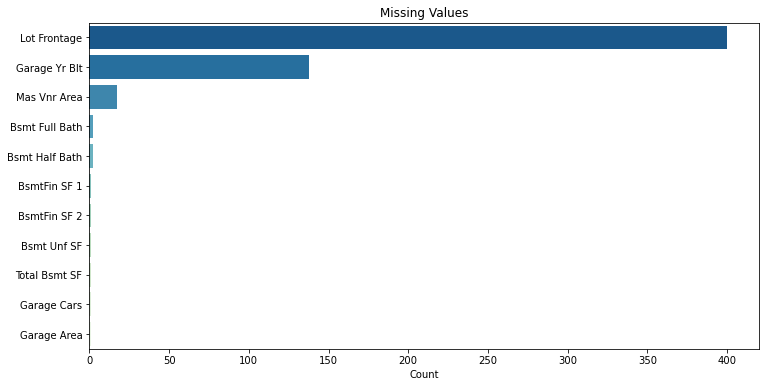

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data_train.head(18).index,
            x=missing_data_train.head(18).Count,
            palette='GnBu_r')
title = plt.title("Missing Values")

In [27]:
missing_data_test_count = X_test.isnull().sum()
missing_data_test_percent = X_test.isnull().sum() / len(X_test) * 100

missing_data_test = pd.DataFrame({
    'Count': missing_data_test_count,
    'Percent': missing_data_test_percent
})
missing_data_test = missing_data_test[missing_data_test.Count > 0]
missing_data_test.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data_test.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data_test.head(10)

There are 3 features having missing data.

Top 10 missing value features:


,Count,Percent
Lot Frontage,90,15.358362
Garage Yr Blt,21,3.583618
Mas Vnr Area,6,1.023891


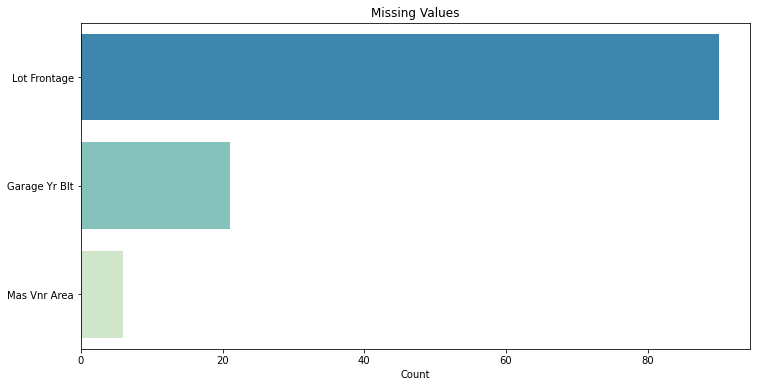

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data_test.head(18).index,
            x=missing_data_test.head(18).Count,
            palette='GnBu_r')
title = plt.title("Missing Values")

In [215]:
# Fill continuous and discrete (exclude 'Lot Frontage') variables with 0
# Fill 'Lot Frontage' variable with its mean value
# Fill 'Garage Yr Blt' with 'Year Built'
variables_train = [
    'Garage Area', 'Garage Cars', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
    'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area'
]

X_train[variables_train] = X_t

rain[variables_train].fillna(0)

X_train['Lot Frontage'] = X_train['Lot Frontage'].fillna(X_train['Lot Frontage'].mean())
X_train['Garage Yr Blt'] = X_train['Garage Yr Blt'].fillna(X_train['Year Built'])

In [216]:
X_test['Mas Vnr Area'] = X_test['Mas Vnr Area'].fillna(0)

X_test['Lot Frontage'] = X_test['Lot Frontage'].fillna(X_test['Lot Frontage'].mean())
X_test['Garage Yr Blt'] = X_test['Garage Yr Blt'].fillna(X_test['Year Built'])

In [ ]:
#Delete outlier

<a name='4'></a>
# 4. Model